In [1]:
import argparse
import subprocess
import pandas as pd
import json
import glob
import os.path
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
# process input files
# ccs
ccs_in = sorted(glob.glob("../../output/ccs/pool*/*.report.txt"))

input_reads = []
kept_ccs = []
for file in ccs_in:
    content = open(file, 'r')
    lines = content.readlines()
    input = 0
    for line in lines:
        if line.startswith("ZMWs pass filters"):
            kept_ccs.append(int(line.strip("\n").split(":")[1].split(" ")[1]))
            input += int(line.strip("\n").split(":")[1].split(" ")[1])
        if line.startswith("ZMWs fail filters"):
            input += int(line.strip("\n").split(":")[1].split(" ")[1])
    input_reads.append(input)
print(input_reads)
print(kept_ccs)

[5018501, 6741262, 6167404, 7381519]
[2886136, 4282218, 3733729, 4530486]


In [4]:
# lima
lima_in = sorted(glob.glob("../../output/lima/pool*/*.demux.hifi.lima.summary"))
kept_lima = []

for file in lima_in:
    content = open(file, 'r')
    lines = content.readlines()
    for line in lines:
        if line.startswith("ZMWs above all thresholds"):
            kept_lima.append(line.strip("\n").split(":")[1].split(" ")[1])
print(kept_lima)

['2509651', '3673724', '3216723', '3879211']


In [5]:
# refine

refine_in = sorted(glob.glob("../../output/refine/pool*/*.ncfl.filter_summary.report.json"))
pool = []
samples = []
all = []
kept_fl = []
kept_polya = []

In [6]:
for file in refine_in:
    pool.append(os.path.basename(file).split(".")[0])
    samples.append(os.path.basename(file).split(".")[1])
    with open(file, 'r') as f:
        d = json.load(f)
        all.append(d["attributes"][1]["value"])
        kept_fl.append(d["attributes"][2]["value"])
        kept_polya.append(d["attributes"][3]["value"])

In [7]:
# prepare refine for pool dataframe
refine_pool_dict = {}
for idx in range(len(pool)):
    if pool[idx] in refine_pool_dict:
        refine_pool_dict[pool[idx]][0] += int(all[idx])
        refine_pool_dict[pool[idx]][1] += int(kept_fl[idx])
        refine_pool_dict[pool[idx]][2] += int(kept_polya[idx])
    else:
        refine_pool_dict[pool[idx]] = []
        refine_pool_dict[pool[idx]].append(int(all[idx]))
        refine_pool_dict[pool[idx]].append(int(kept_fl[idx]))
        refine_pool_dict[pool[idx]].append(int(kept_polya[idx]))
print(refine_pool_dict)

{'pool1': [2509651, 2506302, 2505663], 'pool2': [3673724, 3671909, 3671162], 'pool3': [3216723, 3215314, 3214628], 'pool4': [3879211, 3875757, 3875048]}


In [8]:
# prepare refine for sample dataframe

refine_sample_dict = {}
for idx in range(len(samples)):
    if samples[idx] in refine_sample_dict:
        refine_sample_dict[samples[idx]][0] += int(all[idx])
        refine_sample_dict[samples[idx]][1] += int(kept_fl[idx])
        refine_sample_dict[samples[idx]][2] += int(kept_polya[idx])
    else:
        refine_sample_dict[samples[idx]] = []
        refine_sample_dict[samples[idx]].append(int(all[idx]))
        refine_sample_dict[samples[idx]].append(int(kept_fl[idx]))
        refine_sample_dict[samples[idx]].append(int(kept_polya[idx]))
print(refine_sample_dict)

{'at6923': [891693, 891231, 891069], 'at6929': [614870, 614433, 614271], 'at7143': [695793, 694739, 694619], 'at8285': [462467, 461530, 461416], 'at9104': [613293, 612388, 612266], 'at9336': [723899, 722833, 722673], 'at9503': [668484, 667934, 667785], 'at9578': [967826, 966921, 966731], 'at9744': [698987, 698365, 698207], 'at9762': [541174, 540940, 540844], 'at9806': [469177, 468947, 468853], 'at9830': [499613, 499310, 499203], 'at9847': [798345, 797954, 797782], 'at9852': [502251, 502021, 501926], 'at9879': [461499, 461358, 461274], 'at9883': [453215, 453064, 452954], 'Ha166-4': [494202, 493955, 493847], 'Ha495-1': [427644, 427456, 427354], 'Ha527-3': [570267, 570048, 569924], 'Ha527-3_sp': [570381, 570109, 570011], 'at9900': [649292, 648999, 648866], 'col0': [504937, 504747, 504626]}


In [9]:
# get mapped reads pb
mapped_pb = []
mapped_mini = []

for file in sorted(glob.glob("../../output/mapping_pb/*.bam")):
    print(file)
    mapped_pb.append(subprocess.run([f"samtools view -c -F 4 {file}"], shell=True, capture_output=True, text=True).stdout.strip("\n"))
print(mapped_pb)

# get mapped reads minimap
for file in sorted(glob.glob("../../output/mapping_minimap/*.bam")):
    print(file)
    mapped_mini.append(subprocess.run([f"samtools view -c -F 4 {file}"], shell=True, capture_output=True, text=True).stdout.strip("\n"))
print(mapped_mini)

../../output/mapping_pb/at6923.mapped.bam
../../output/mapping_pb/at6929.mapped.bam
../../output/mapping_pb/at7143.mapped.bam
../../output/mapping_pb/at8285.mapped.bam
../../output/mapping_pb/at9104.mapped.bam
../../output/mapping_pb/at9336.mapped.bam
../../output/mapping_pb/at9503.mapped.bam
../../output/mapping_pb/at9578.mapped.bam
../../output/mapping_pb/at9744.mapped.bam
../../output/mapping_pb/at9762.mapped.bam
../../output/mapping_pb/at9806.mapped.bam
../../output/mapping_pb/at9830.mapped.bam
../../output/mapping_pb/at9847.mapped.bam
../../output/mapping_pb/at9852.mapped.bam
../../output/mapping_pb/at9879.mapped.bam
../../output/mapping_pb/at9883.mapped.bam
../../output/mapping_pb/at9900.mapped.bam
../../output/mapping_pb/col0.mapped.bam
['858741', '589389', '675113', '446256', '616228', '707240', '656640', '931147', '686121', '516363', '463638', '478886', '762602', '473759', '456089', '443161', '627192', '502998']
../../output/mapping_minimap/at6923.mapped.bam
../../output/mappi

In [41]:
# create dataframes
pool_df = pd.DataFrame({'CCS Input': input_reads,
                        'CCS kept': kept_ccs,
                        'Lima kept': kept_lima,
                        'Full-Length Reads': [x[0] for x in refine_pool_dict.values()],
                        'Full-Length Non-Chimeric Reads': [x[1] for x in refine_pool_dict.values()],
                        'Full-Length Non-Chimeric Reads with Poly-A Tail': [x[2] for x in refine_pool_dict.values()]})
pool_df.index = sorted(list(set(pool)))

pool_df["kept"]=pool_df["Full-Length Non-Chimeric Reads with Poly-A Tail"]/pool_df["CCS Input"]
pool_df.to_csv('./pipeline_pools.stats.csv')

In [44]:
pool_df

,CCS Input,CCS kept,Lima kept,Full-Length Reads,Full-Length Non-Chimeric Reads,Full-Length Non-Chimeric Reads with Poly-A Tail,kept
pool1,5018501,2886136,2509651,2509651,2506302,2505663,0.499285
pool2,6741262,4282218,3673724,3673724,3671909,3671162,0.544581
pool3,6167404,3733729,3216723,3216723,3215314,3214628,0.521229
pool4,7381519,4530486,3879211,3879211,3875757,3875048,0.524966


In [12]:
sample_df = pd.DataFrame({'Full-Length Reads': [x[0] for x in refine_sample_dict.values()],
                           'Full-Length Non-Chimeric Reads': [x[1] for x in refine_sample_dict.values()],
                           'Full-Length Non-Chimeric Reads with Poly-A Tail': [x[2] for x in refine_sample_dict.values()]})

unique_list = []
for s in samples:
    if s not in unique_list:
        unique_list.append(s)
sample_df.index = unique_list

sample_df.to_csv('./pipeline_samples.stats.csv')

In [13]:
sample_df

,Full-Length Reads,Full-Length Non-Chimeric Reads,Full-Length Non-Chimeric Reads with Poly-A Tail
at6923,891693,891231,891069
at6929,614870,614433,614271
at7143,695793,694739,694619
at8285,462467,461530,461416
at9104,613293,612388,612266
at9336,723899,722833,722673
at9503,668484,667934,667785
at9578,967826,966921,966731
at9744,698987,698365,698207
at9762,541174,540940,540844


In [14]:
for i in['Ha166-4','Ha495-1','Ha527-3','Ha527-3_sp']:
    del refine_sample_dict[i]
print(refine_sample_dict)

{'at6923': [891693, 891231, 891069], 'at6929': [614870, 614433, 614271], 'at7143': [695793, 694739, 694619], 'at8285': [462467, 461530, 461416], 'at9104': [613293, 612388, 612266], 'at9336': [723899, 722833, 722673], 'at9503': [668484, 667934, 667785], 'at9578': [967826, 966921, 966731], 'at9744': [698987, 698365, 698207], 'at9762': [541174, 540940, 540844], 'at9806': [469177, 468947, 468853], 'at9830': [499613, 499310, 499203], 'at9847': [798345, 797954, 797782], 'at9852': [502251, 502021, 501926], 'at9879': [461499, 461358, 461274], 'at9883': [453215, 453064, 452954], 'at9900': [649292, 648999, 648866], 'col0': [504937, 504747, 504626]}


In [15]:
at_sample_df = pd.DataFrame({'Full-Length Reads': [x[0] for x in refine_sample_dict.values()],
                             'Full-Length Non-Chimeric Reads': [x[1] for x in refine_sample_dict.values()],
                             'Full-Length Non-Chimeric Reads with Poly-A Tail': [x[2] for x in refine_sample_dict.values()],
                             'pbmm2-Mapping': [x for x in mapped_pb],
                             'minimap2-Mapping': [x for x in mapped_mini]})

In [16]:
unique_list = []
for s in samples:
    if s not in unique_list and s not in ['Ha166-4','Ha495-1','Ha527-3','Ha527-3_sp']:
        unique_list.append(s)
at_sample_df.index = unique_list

print(at_sample_df)
at_sample_df.to_csv('./at_samples.stats.csv')

        Full-Length Reads  Full-Length Non-Chimeric Reads  \
at6923             891693                          891231   
at6929             614870                          614433   
at7143             695793                          694739   
at8285             462467                          461530   
at9104             613293                          612388   
at9336             723899                          722833   
at9503             668484                          667934   
at9578             967826                          966921   
at9744             698987                          698365   
at9762             541174                          540940   
at9806             469177                          468947   
at9830             499613                          499310   
at9847             798345                          797954   
at9852             502251                          502021   
at9879             461499                          461358   
at9883             45321

In [129]:
at_sample_df.T[["col0","at9900","at9883","at9578","at8285"]]

,col0,at9900,at9883,at9578,at8285
Full-Length Reads,504937,649292,453215,967826,462467
Full-Length Non-Chimeric Reads,504747,648999,453064,966921,461530
Full-Length Non-Chimeric Reads with Poly-A Tail,504626,648866,452954,966731,461416
pbmm2-Mapping,502998,627192,443161,931147,446256
minimap2-Mapping,515929,653093,464141,966659,460200


In [94]:
rel=at_sample_df.T[["col0","at9900","at9883","at9578","at8285"]].T

In [95]:
rel["pbmm2-Mapping"]=rel["pbmm2-Mapping"].astype(int)
rel["minimap2-Mapping"]=rel["minimap2-Mapping"].astype(int)

In [109]:
rel=rel[['Full-Length Reads', 'Full-Length Non-Chimeric Reads',
       'Full-Length Non-Chimeric Reads with Poly-A Tail', 'pbmm2-Mapping',
       'minimap2-Mapping']].div(rel['Full-Length Reads'], axis=0)

In [110]:
pb=rel.drop("minimap2-Mapping", axis=1)
mini=rel.drop("pbmm2-Mapping", axis=1)

In [111]:
pb.reset_index(inplace=True)
mini.reset_index(inplace=True)

In [112]:
pb.columns = ['accession','Full-Length Reads', 'Full-Length Non-Chimeric Reads','Full-Length Non-Chimeric Reads with Poly-A Tail', 'mapping']
mini.columns = ['accession','Full-Length Reads', 'Full-Length Non-Chimeric Reads','Full-Length Non-Chimeric Reads with Poly-A Tail', 'mapping']

In [113]:
pb["mapper"]="pbmm2"
mini["mapper"]="minimap2"

In [114]:
x=pd.concat([pb, mini])

In [123]:
x2=pd.melt(x, id_vars=["accession","mapper"],value_vars=['Full-Length Reads', 'Full-Length Non-Chimeric Reads','Full-Length Non-Chimeric Reads with Poly-A Tail','mapping'])

In [127]:
x2["value"]=x2["value"]*100

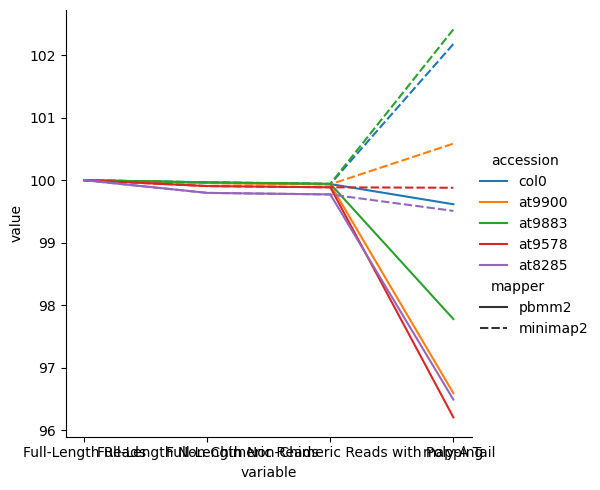

In [128]:
sns.relplot(x2, x="variable",y="value",hue="accession", style="mapper", kind="line")

In [15]:
samples=pd.read_csv("at_samples.stats.csv")

In [58]:
samples.columns = ['accession', 'Full-Length Reads', 'Full-Length Non-Chimeric Reads',
       'Full-Length Non-Chimeric Reads with Poly-A Tail', 'pbmm2-Mapping',
       'minimap2-Mapping']

samples.columns = ['Accession', 'FL Reads', 'FLNC Reads',
       'FLNC Reads + Poly(A)', 'pbmm2',
       'minimap2']

In [61]:
p1_melt=samples.melt(id_vars="Accession", value_vars=['FL Reads', 'FLNC Reads',
       'FLNC Reads + Poly(A)', 'pbmm2',
       'minimap2'])

In [62]:
p1_melt

,Accession,variable,value
0,at6923,FL Reads,891693
1,at6929,FL Reads,614870
2,at7143,FL Reads,695793
3,at8285,FL Reads,462467
4,at9104,FL Reads,613293
...,...,...,...
85,at9852,minimap2,498017
86,at9879,minimap2,475608
87,at9883,minimap2,464141
88,at9900,minimap2,653093


In [70]:
sns.move_legend(ncols)

NameError: name 'ncols' is not defined

/tmp/ipykernel_92445/1257314012.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


<Figure size 1200x500 with 0 Axes>

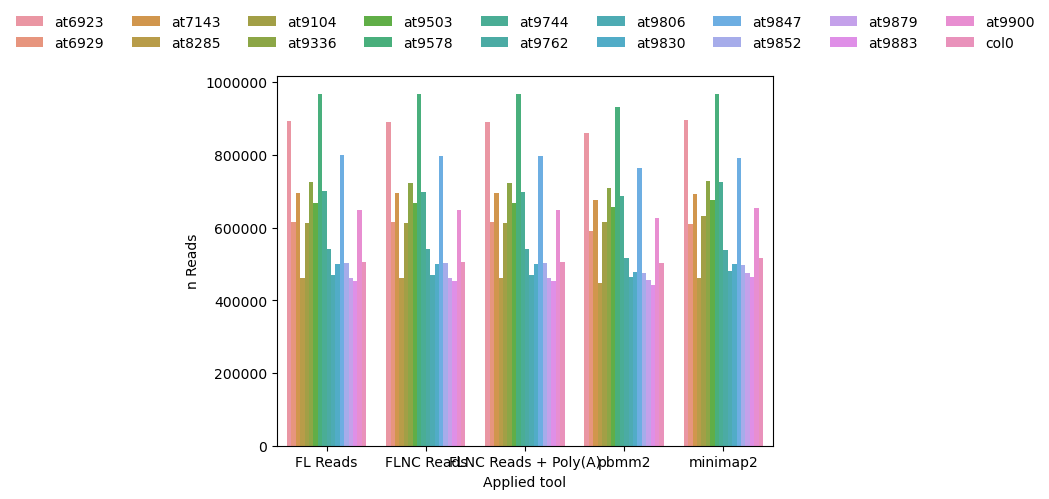

<Figure size 1200x500 with 0 Axes>

In [112]:
from matplotlib.pyplot import figure

sns.set_palette(sns.color_palette("colorblind"))
#plt.figure(figsize=(12,5))

fig, ax = plt.subplots(1, 1)
p1=sns.barplot(p1_melt, x="variable", y="value", hue="Accession", ax=ax)

p1.set_xlabel("Applied tool")
p1.set_ylabel("n Reads")

sns.move_legend(p1, "upper center",
    bbox_to_anchor=(0.5, 1.2), ncols=9, title=None, frameon=False,
)

labels = [int(float(t.get_text())*1000000) for t in ax.get_yticklabels()]
ax.set_yticklabels(labels)
figure(figsize=(12,5))


#p1.axes.ticklabel_format(style='plain', axis='both')

/tmp/ipykernel_92445/115218684.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  p1.set_yticklabels([0, 200000, 400000, 600000, 800000, 1000000])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '200000'),
 Text(0, 400000.0, '400000'),
 Text(0, 600000.0, '600000'),
 Text(0, 800000.0, '800000'),
 Text(0, 1000000.0, '1000000'),
 Text(0, 1200000.0, '')]

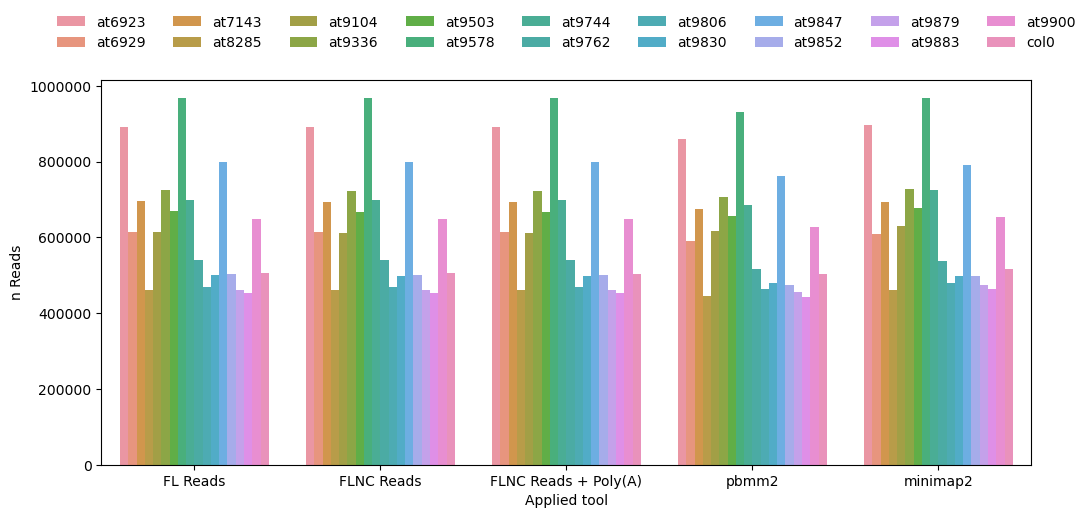

In [114]:
sns.set_palette(sns.color_palette("colorblind"))
plt.figure(figsize=(12,5))

p1=sns.barplot(p1_melt, x="variable", y="value", hue="Accession")

p1.set_xlabel("Applied tool")
p1.set_ylabel("n Reads")

sns.move_legend(p1, "upper center",
    bbox_to_anchor=(0.5, 1.2), ncols=9, title=None, frameon=False,
)

#labels = [int(float(t.get_text())*1000000) for t in ax.get_yticklabels()]
p1.set_yticklabels([0, 200000, 400000, 600000, 800000, 1000000])


#p1.axes.ticklabel_format(style='plain', axis='both')

In [115]:
fig = p1.get_figure()
fig.savefig("at_samples.stats.png", bbox_inches='tight', dpi=200)